## Made by Shubham Sharma

## Understanding the SYMMETRY FUNCTIONS

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

plt.rcParams['text.usetex'] = True #To use LaTEX fonts

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [2]:
def fc(Rij):
    return 0.5*(np.cos(np.pi * (Rij/Rc))+1)

[0.000e+00 1.000e-03 2.000e-03 ... 1.197e+00 1.198e+00 1.199e+00] [1.         0.99999753 0.99999013 ... 0.09273964 0.09365292 0.09457021]


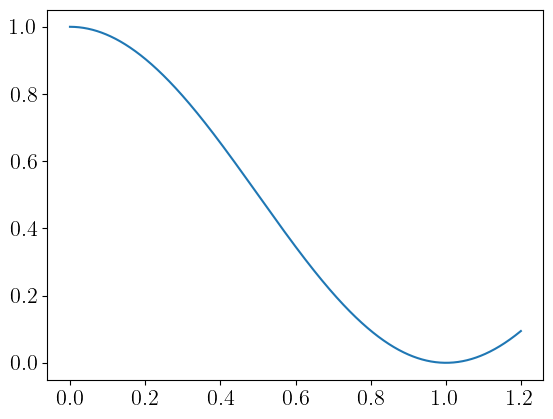

In [3]:
Rij = np.arange(0, 1.2, 0.001)
Rc= 1
y = fc(Rij)
print(Rij, fc(Rij))
plt.plot(Rij, fc(Rij))

## Types of CutOff functions used

In [4]:
#To use Rij as array one needs to use np.where
def cosine_cf(Rij):
    return np.where(Rij<= Rc, 0.5*(np.cos(np.pi * (Rij/Rc))+1), 0)

def tanh_cf(Rij):
    return np.where(Rij<=Rc, (np.tanh(1 - (Rij/Rc)))**3, 0)

def exp_cf(Rij):
    return np.where(Rij<=Rc, np.exp(1 - (1/(1 - (Rij/Rc)**2))), 0)

def poly4_cf(Rij):
    return np.where(Rij<=Rc, (Rij**5)*((Rij)* ((Rij) * ((Rij) * (315 - 70*Rij) -540 ) +420 ) -126) +1, 0)

/var/folders/zp/6vgftmh51056lrxw145drqtr0000gn/T/ipykernel_10659/530407748.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.where(Rij<=Rc, np.exp(1 - (1/(1 - (Rij/Rc)**2))), 0)


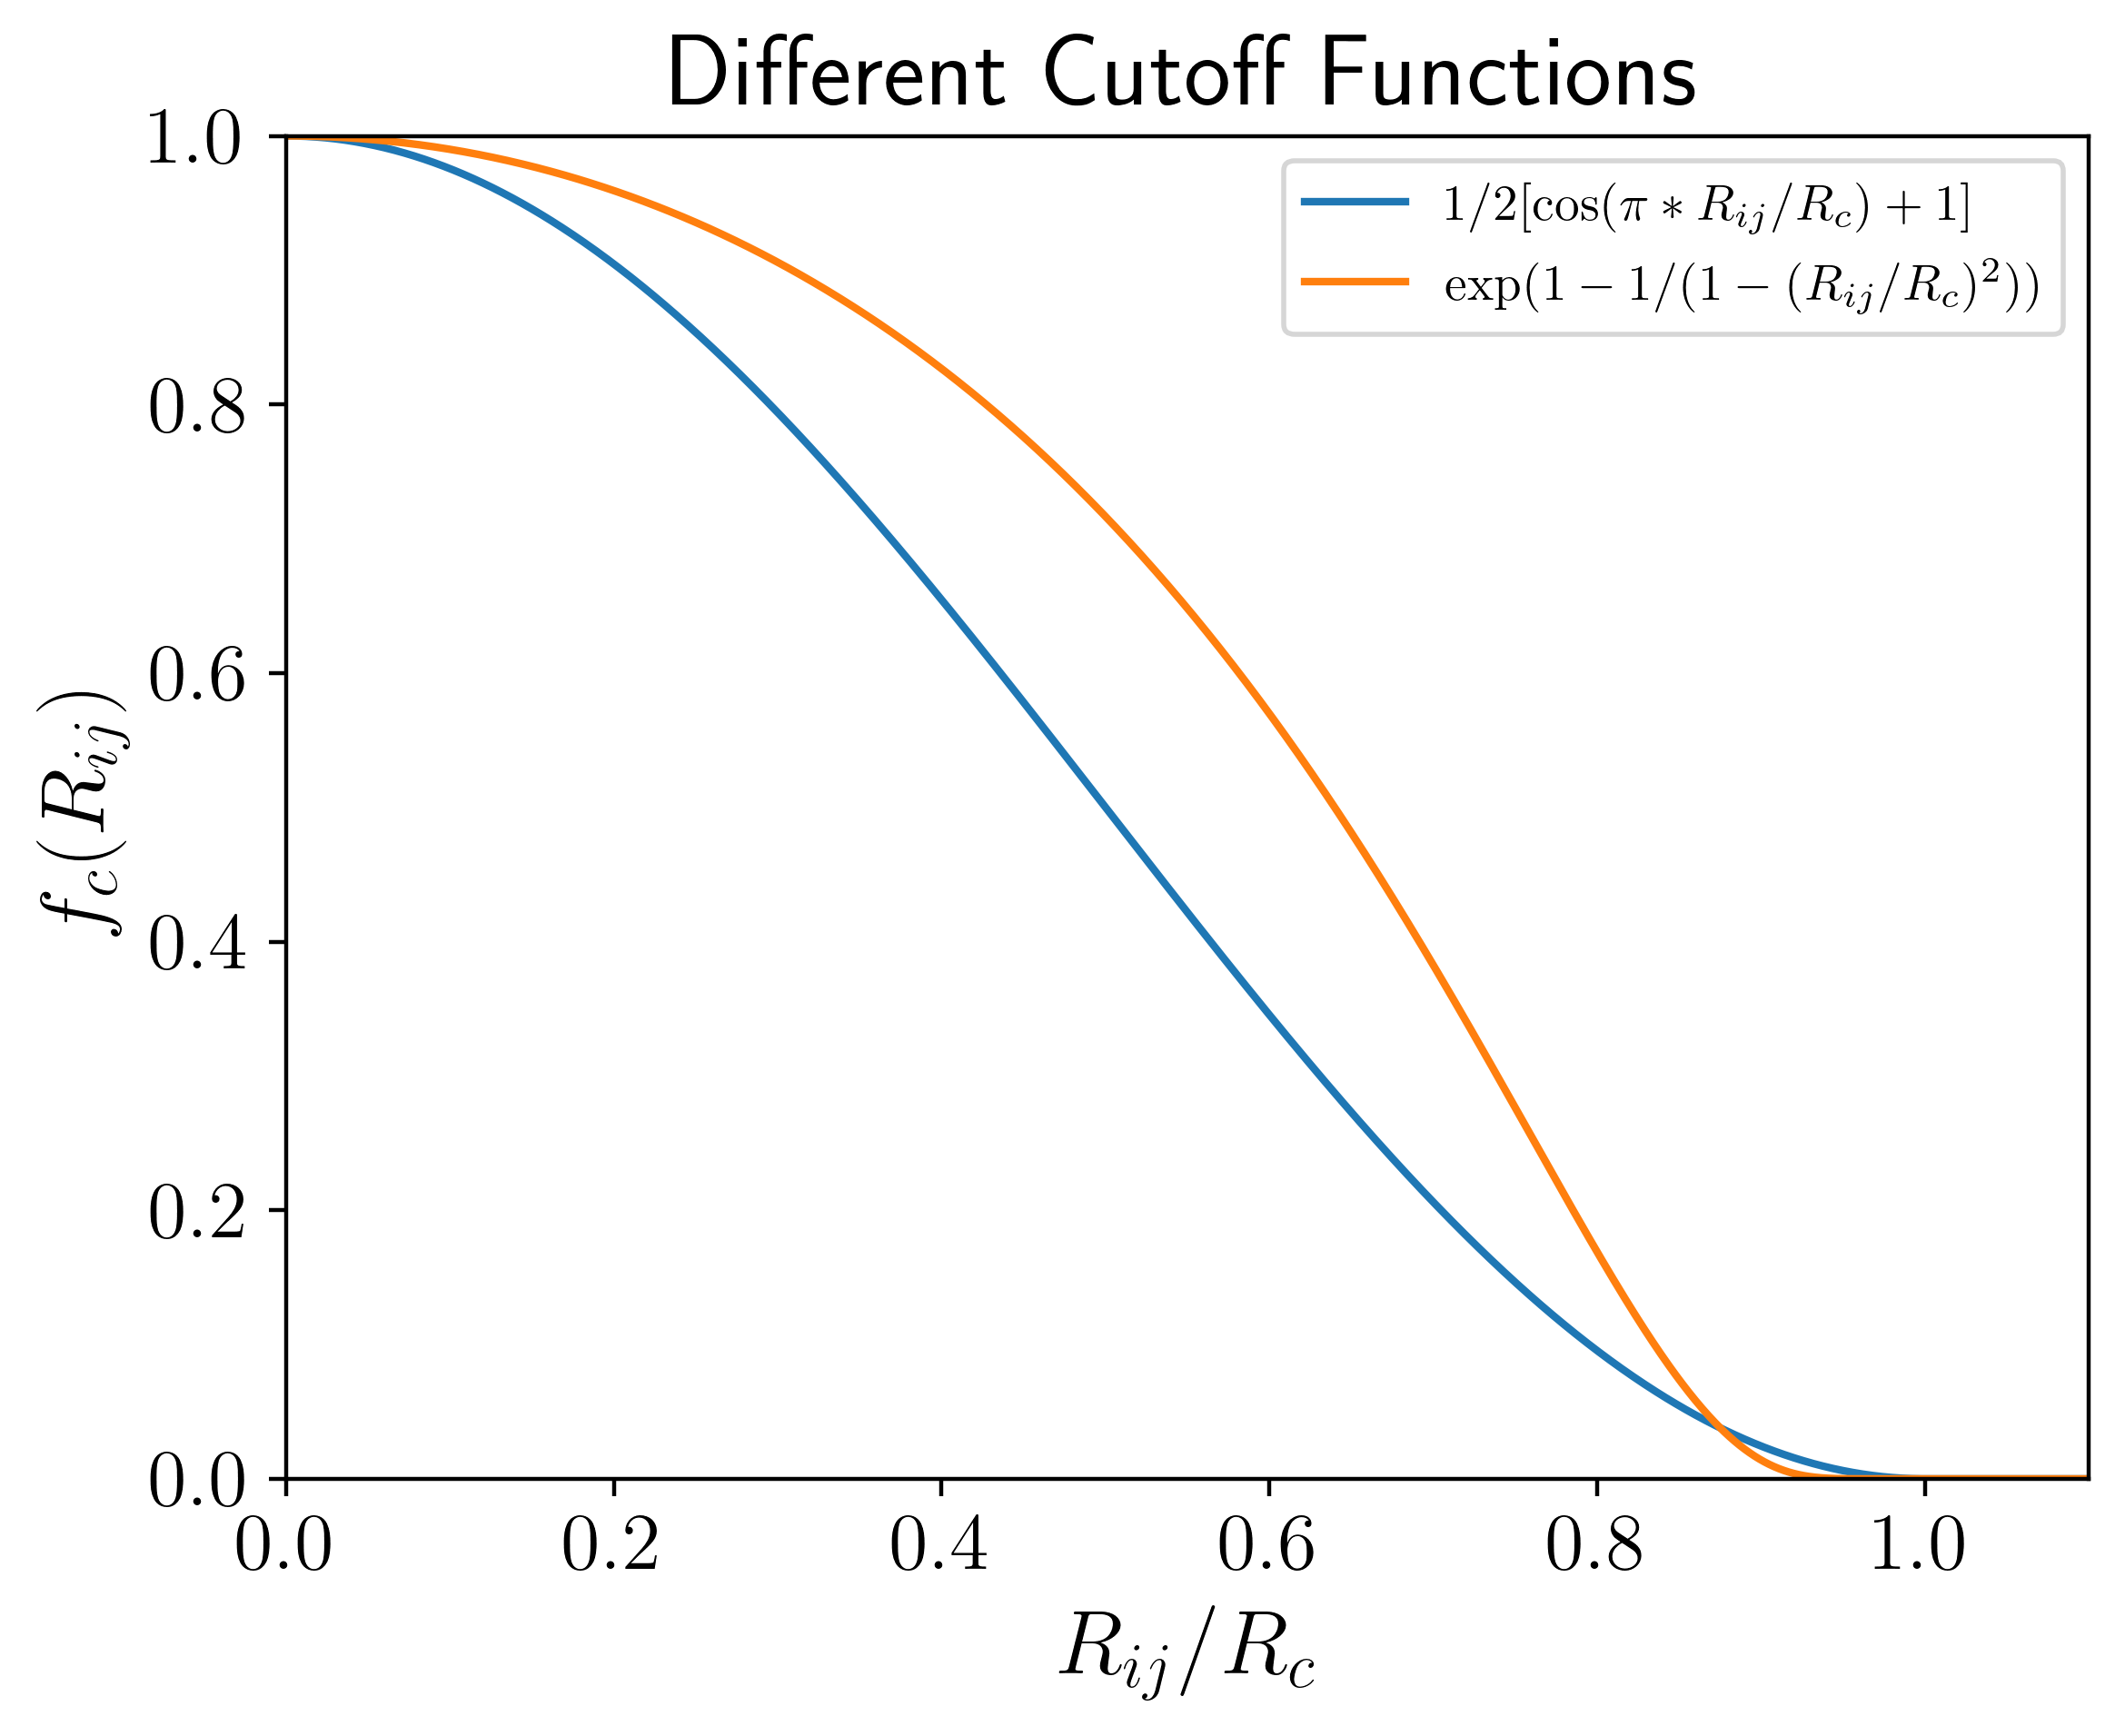

In [5]:
#Rij = np.arange(0, 1.2, 0.001)
#Rc= 1
plt.figure(dpi=400)
plt.xlim(0, 1.1)
plt.ylim(0,1)
plt.plot(Rij/Rc, cosine_cf(Rij), label= r"$1/2[\cos(\pi*R_{ij}/R_{c})+1]$")
plt.plot(Rij/Rc, exp_cf(Rij), label= r"$\exp(1-1/(1-(R_{ij}/R_{c})^{2}))$")
#plt.plot(Rij/Rc, tanh_cf(Rij), label= r"$\tanh^{3}(1-R_{ij}/R_{c})$")
#plt.plot(Rij/Rc, poly4_cf(Rij), label= r"$\tanh^{3}(1-R_{ij}/R_{c})$")
plt.xlabel(r"$R_{ij}/R_{c}$", fontsize = 18)
plt.ylabel(r"$f_{c}(R_{ij})$", fontsize = 18)
plt.title("Different Cutoff Functions", fontsize = 20)
plt.legend()
# plt.savefig('CFs.png', dpi =400)

## Radial Symmetry Function 

In [6]:
#Radial Gaussian function

def G_rad(Rij):
    return np.exp(-eta * ((Rij-Rs)**2))

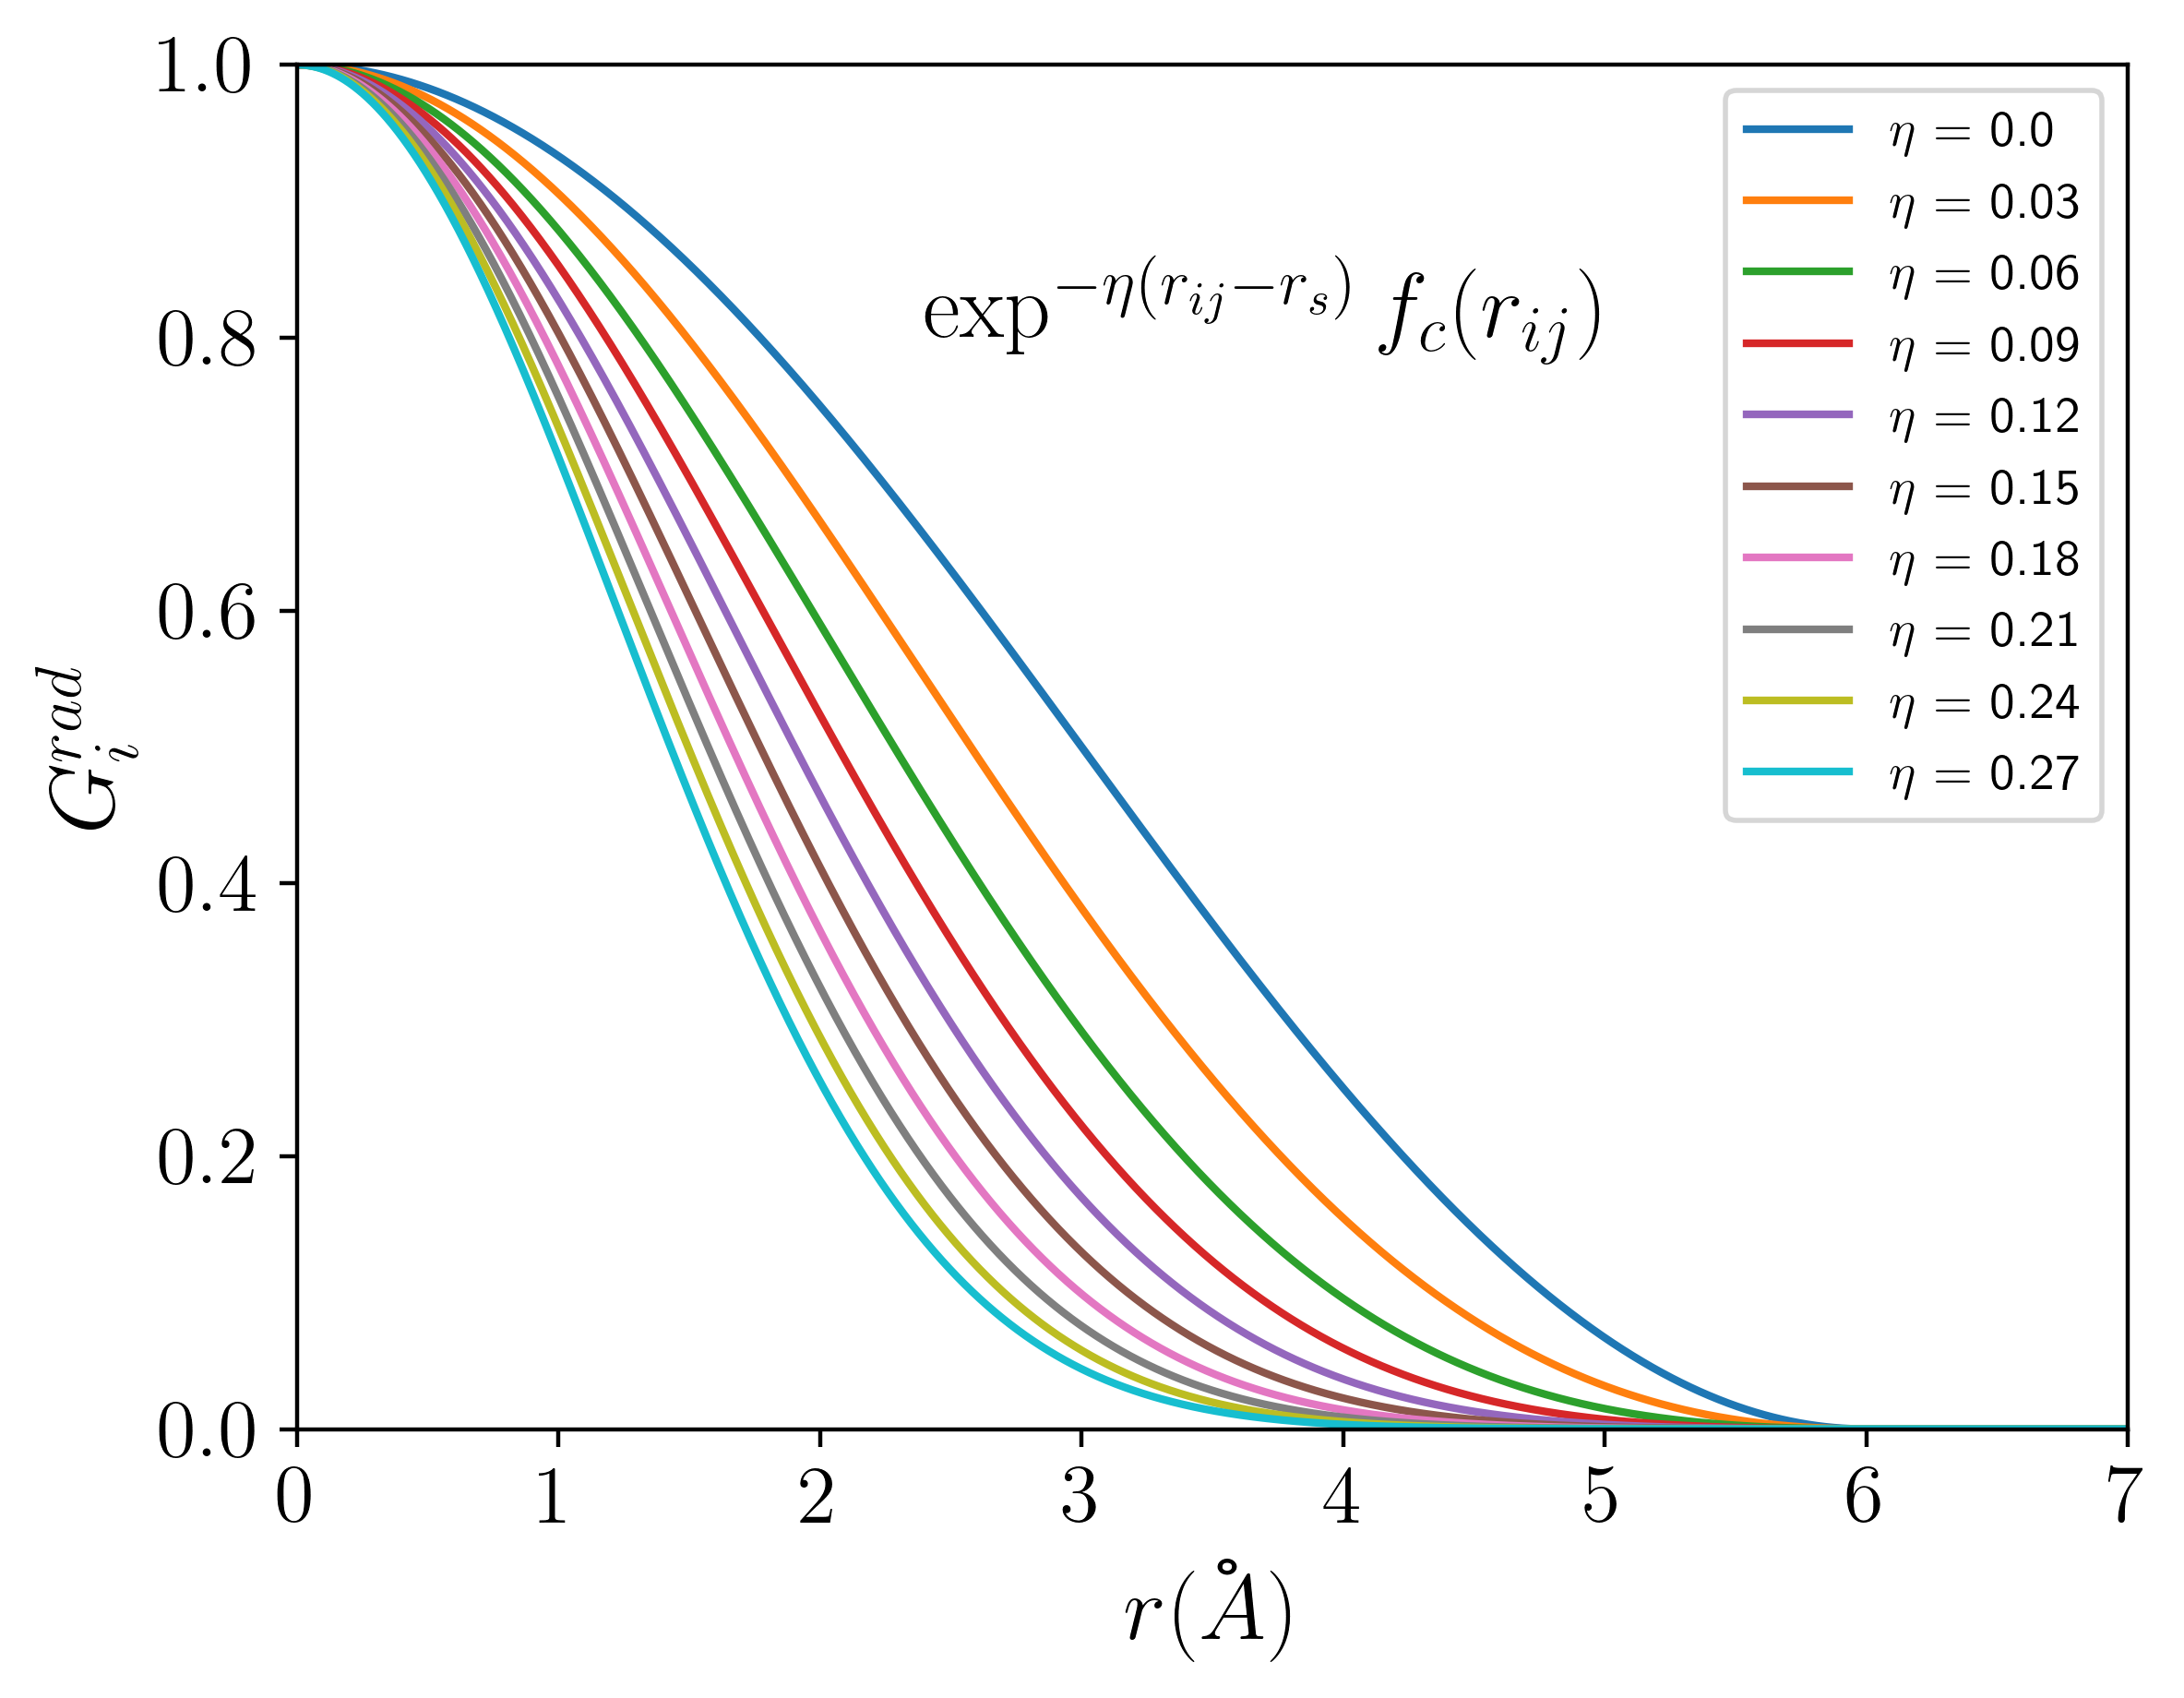

In [9]:
#Effect of eta

#eta = 0.001
eta = np.arange(0, 0.3, 0.03)
Rs = 0      #R_shift = 0A 
Rc = 6      #Cutoff Rc = 6A

Rij = np.arange(0, 7, 0.001)

fig, ax = plt.subplots(dpi = 400)
plt.xlim(0, 7)
plt.ylim(0, 1)

for eta in eta:
    plt.plot(Rij, G_rad(Rij) * cosine_cf(Rij), label = f"$\eta$ = {eta}")
plt.legend()
plt.xlabel(r'$r (\AA)$', fontsize = 18)
plt.ylabel(r'$G_i^{rad}$', fontsize = 18)
ax.text(2.4, 0.8, r'$\exp^{-\eta(r_{ij} - r_{s})} f_{c}(r_{ij})$', fontsize = 18)
plt.savefig('RSFs.png', dpi =400)


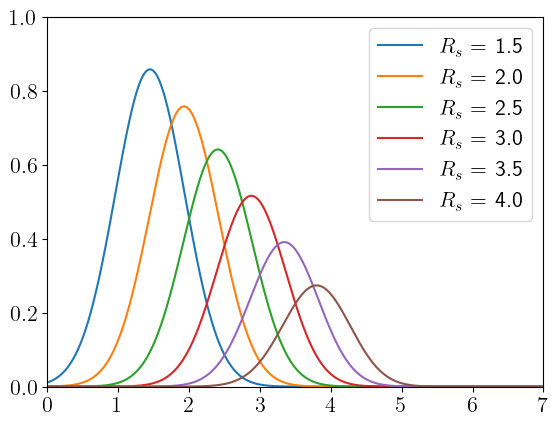

In [76]:
#Effect of R_shift

eta =  2   #eta = 2A
Rs = np.arange(1.5, 4.5, 0.5)      #R_shift = array[0, 4A] 
Rc = 6      #Cutoff Rc = 6A

Rij = np.arange(0, 7, 0.001)

plt.figure()
plt.xlim(0, 7)
plt.ylim(0, 1)

for Rs in Rs:
    plt.plot(Rij, G_rad(Rij) * cosine_cf(Rij), label = f"$R_s$ = {Rs}")
plt.legend(prop={'size': 16})
plt.savefig('RSFs_Rs.png', dpi =400)

## Angular Symmetry Functions

In [11]:
def G_ang(theta_ijk):
    return np.power(2,(1 - zeta), dtype = np.float32) * (1 + lmda * np.cos(theta_ijk))**zeta

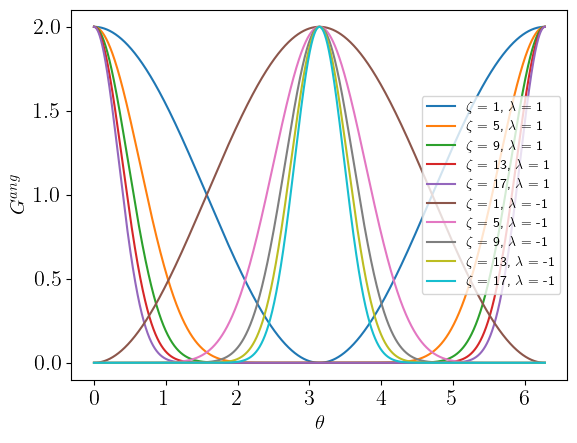

In [34]:
#Angular part only

zeta = np.arange(1, 20, 4)
lmda = np.array([1, -1])   #lamda = +1 or -1

#zeta = 1

theta_ijk = np.arange(0, 2*np.pi, 0.001)

plt.figure()

for lmda, zeta in itertools.product(lmda, zeta, repeat=1):
    plt.plot(theta_ijk, G_ang(theta_ijk), label = f"$\zeta$ = {zeta}, $\lambda$ = {lmda}")


plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel(r'$G^{ang}$', fontsize = 15)
plt.legend()
plt.savefig('ASFs_1.png', dpi =400)

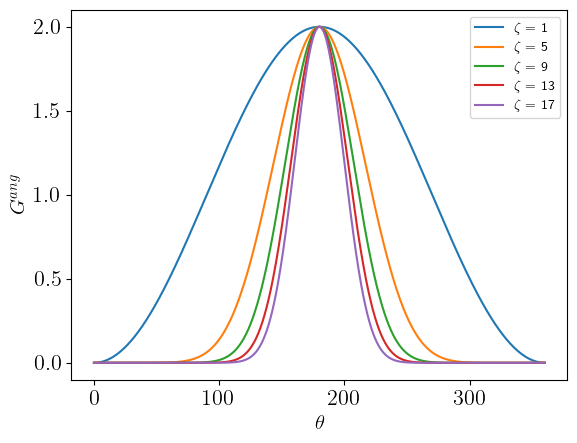

In [94]:
zeta = np.arange(1, 20, 4)
#lmda = np.array([1, -1])   #lamda = +1 or -1

lmda = -1

#zeta = 1

theta_ijk = np.arange(0, 2*np.pi, 0.001)
for zeta in zeta:
    plt.plot(theta_ijk*180/np.pi, G_ang(theta_ijk), label = f"$\zeta$ = {zeta}")
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel(r'$G^{ang}$', fontsize = 15)
plt.legend()
plt.savefig('ASFs_-1.png', dpi =400)

## Contour Plot for dipicting the influence of lamda and zeta 

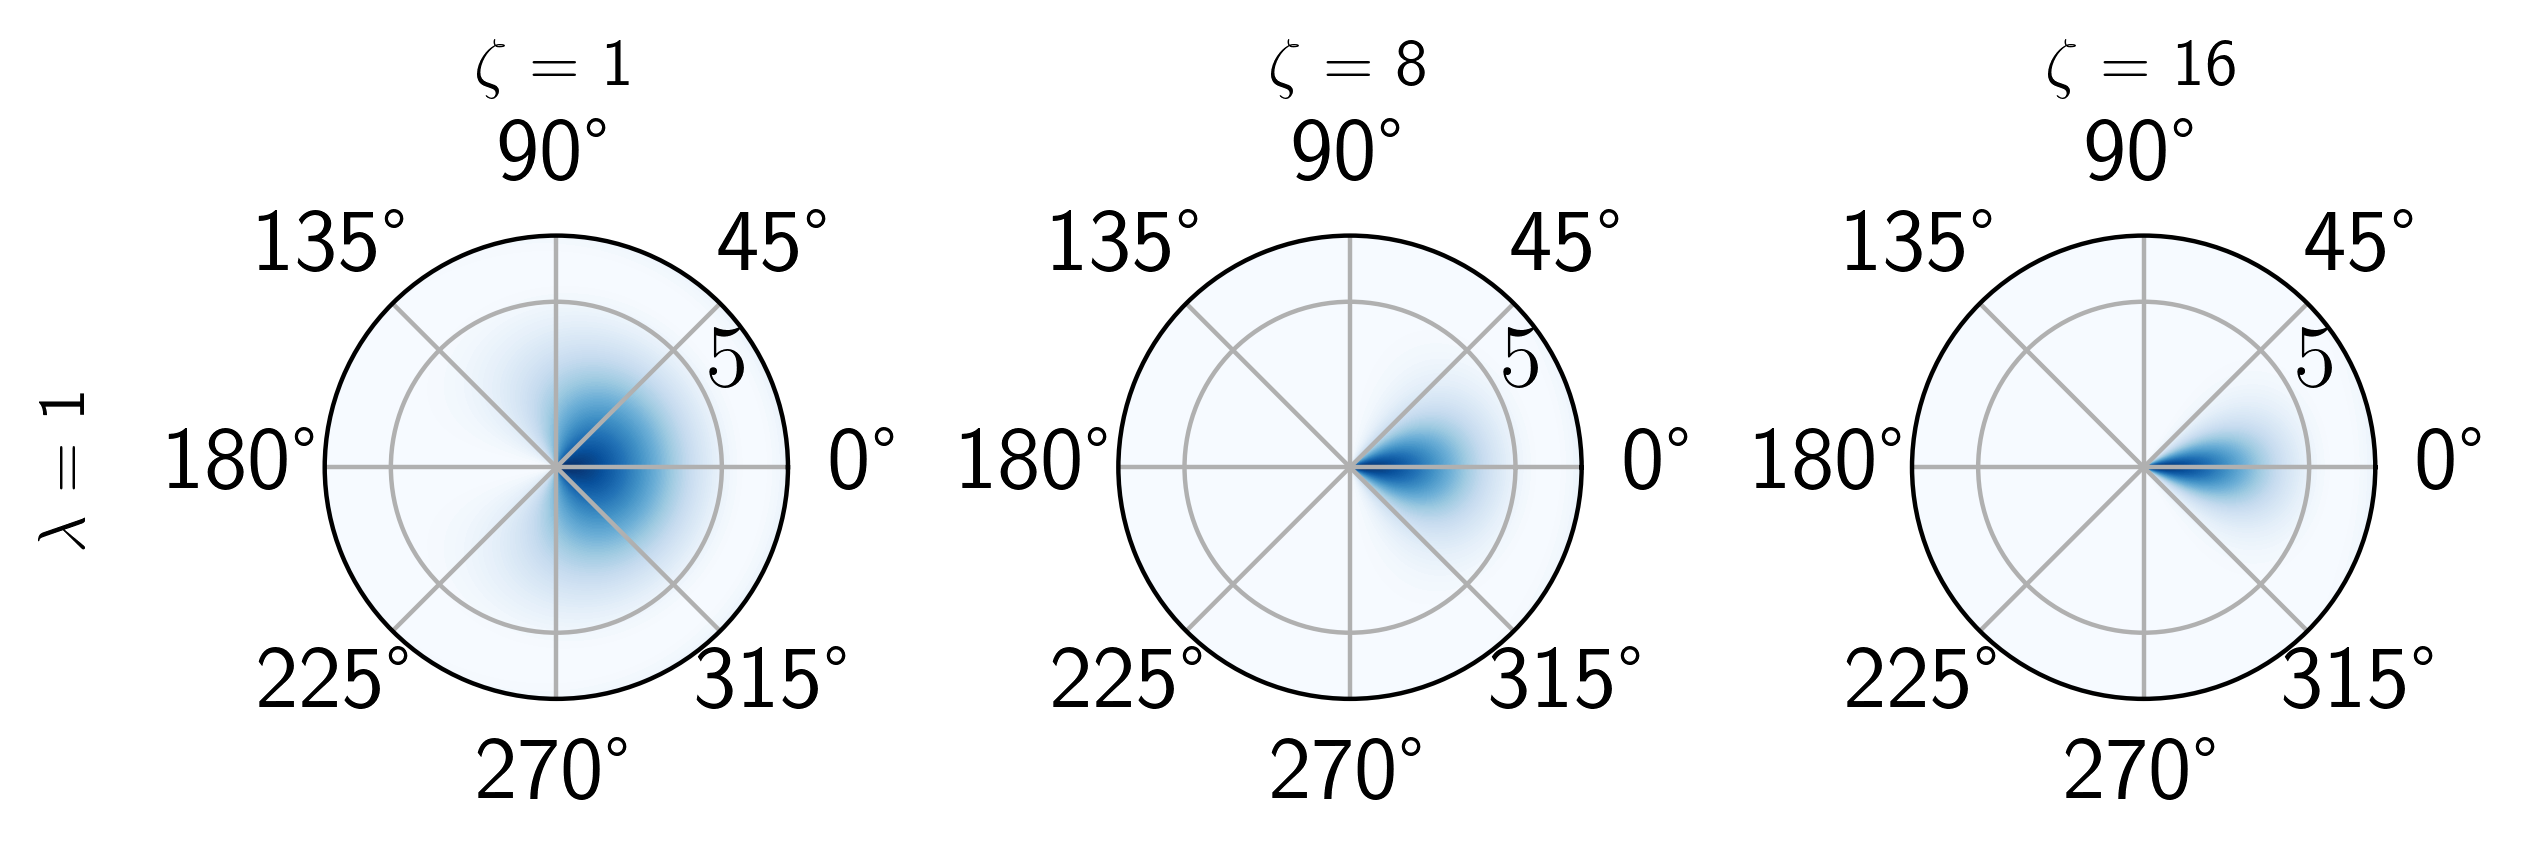

In [35]:
eta = 0
Rc = 6
Rs = 0

# zeta = 1
# lmda = 1

Rij = np.arange(0, 7, 0.001)
theta_ijk = np.arange(0, 2*np.pi, 0.001)

Rmesh, theta_mesh = np.meshgrid(Rij, theta_ijk)        #Generating mesh IMPORTANT FOR CONTOUR PLOTS

lmda = 1
zeta = np.array([1, 8, 16])

fig, ax = plt.subplots(1, 3, dpi = 400, subplot_kw = dict(projection = 'polar'))
fig.supylabel(f'$\lambda$ = {lmda}')
i=0
for zeta in zeta:
    Function = G_ang(theta_mesh) * G_rad(Rmesh) * fc(Rmesh)
    ax[i].contourf(theta_mesh, Rmesh, Function, 100, cmap ='Blues')
    ax[i].set_title(f'$\zeta$ = {zeta}')
    i+=1

fig.tight_layout()
plt.savefig('CP_lamda1.png', dpi= 400,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto'
       )

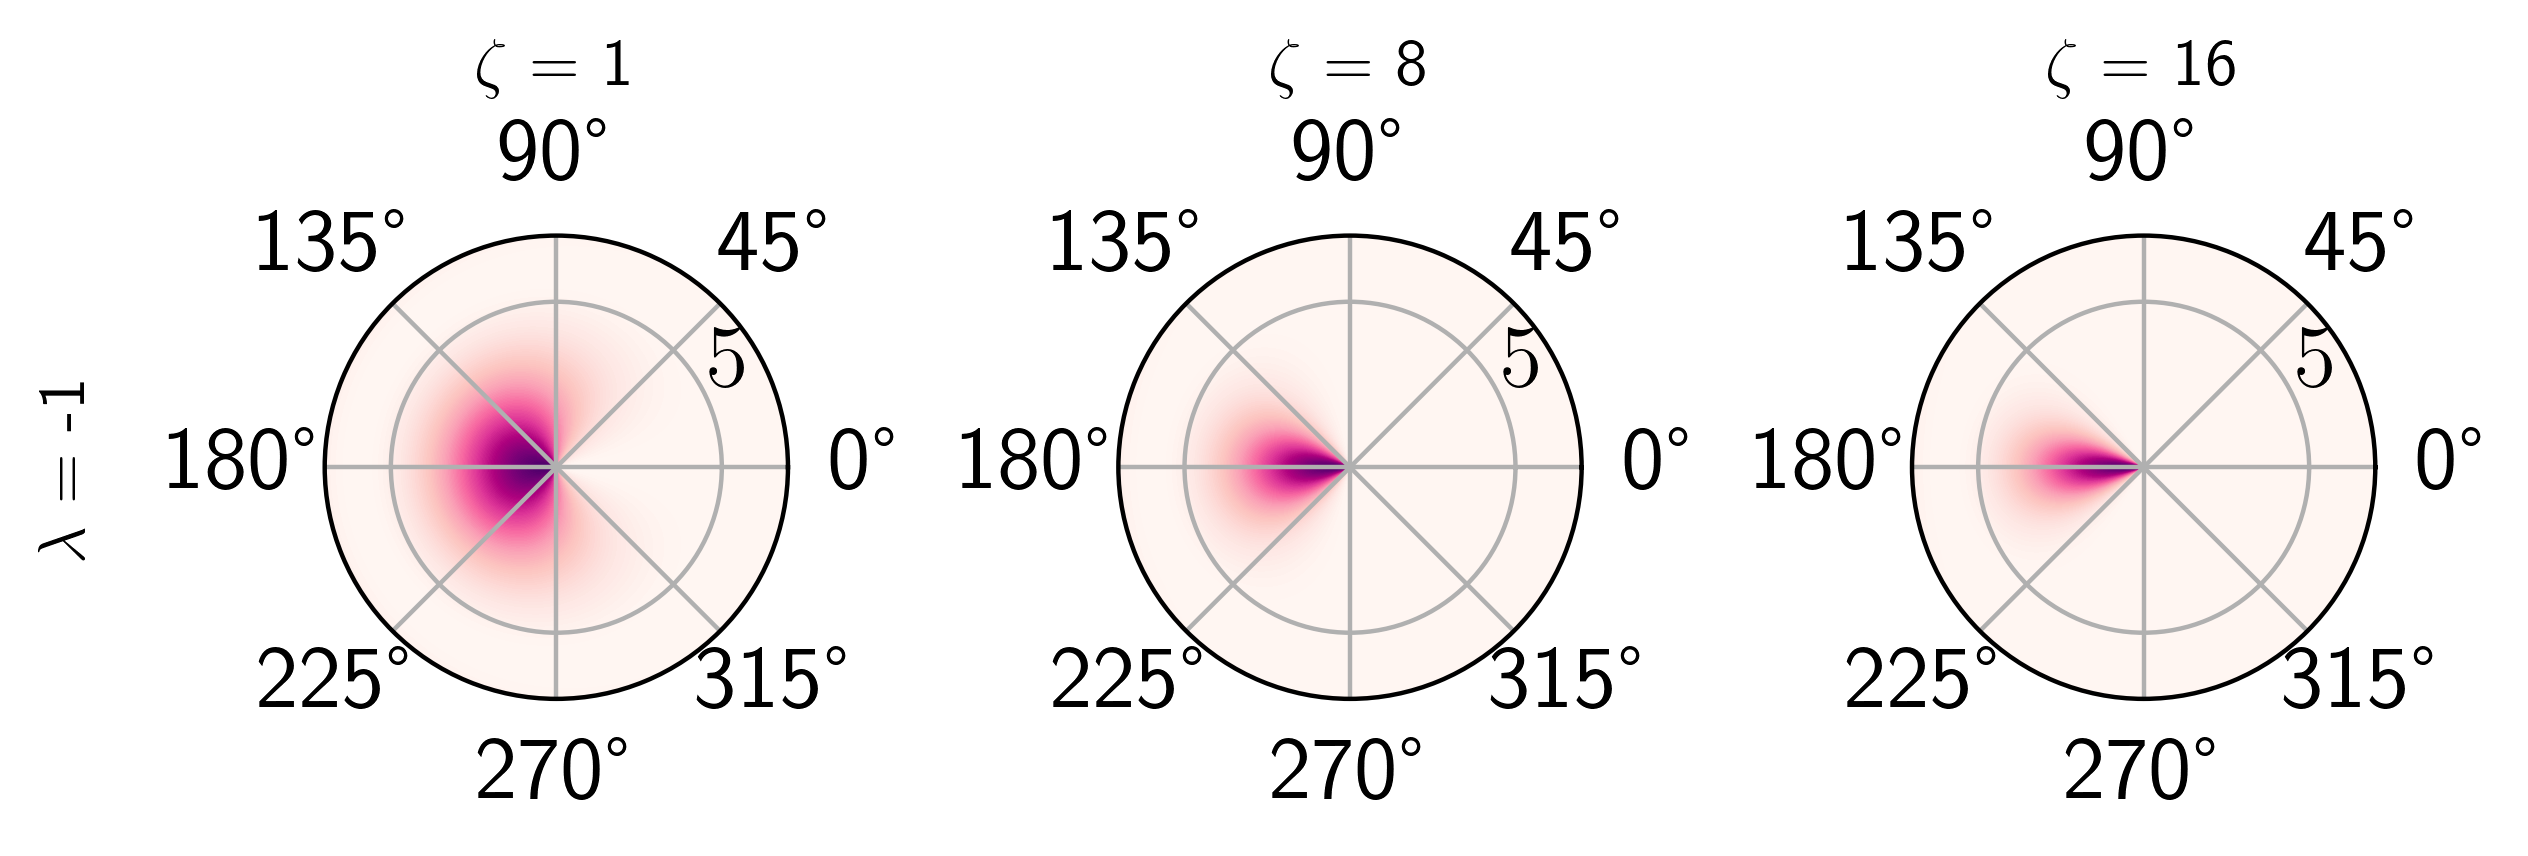

In [36]:
eta = 0.01
Rc = 6
Rs = 0

# zeta = 1
# lmda = 1

Rij = np.arange(0, 7, 0.001)
theta_ijk = np.arange(0, 2*np.pi, 0.001)

Rmesh, theta_mesh = np.meshgrid(Rij, theta_ijk)        #Generating mesh IMPORTANT FOR CONTOUR PLOTS

lmda = -1
zeta = np.array([1, 8, 16])

fig, ax = plt.subplots(1, 3, dpi = 400, subplot_kw = dict(projection = 'polar'))
fig.supylabel(f'$\lambda$ = {lmda}')
i=0
for zeta in zeta:
    Function = G_ang(theta_mesh) * G_rad(Rmesh) * fc(Rmesh)
    ax[i].contourf(theta_mesh, Rmesh, Function, 100, cmap ='RdPu')
    ax[i].set_title(f'$\zeta$ = {zeta}')
    i+=1

fig.tight_layout()
#plt.show()

plt.savefig('CP_lamda-1.png', dpi= 400,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto'
       )

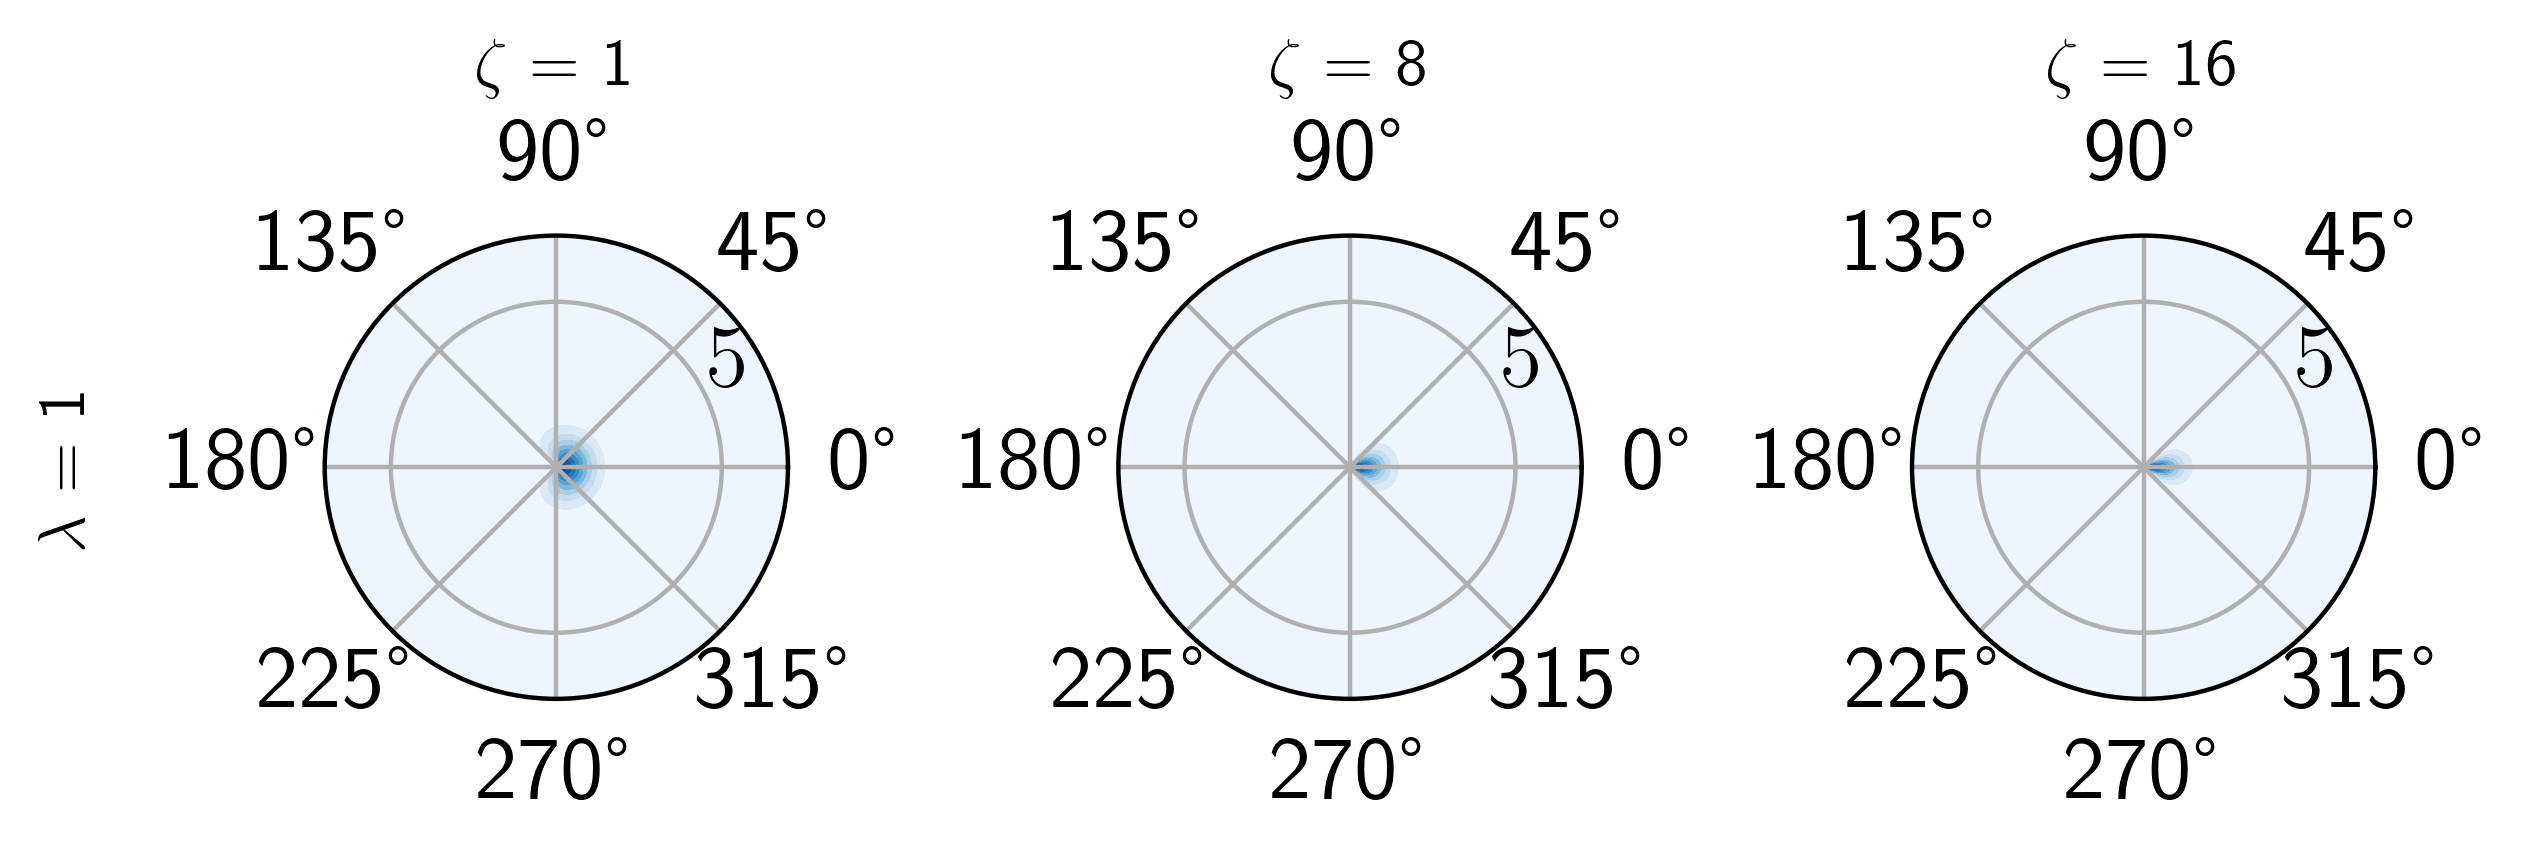

In [99]:
#Testing

eta = 1
Rc = 6
Rs = 0

# zeta = 1
# lmda = 1

Rij = np.arange(0, 7, 0.001)
theta_ijk = np.arange(0, 2*np.pi, 0.001)

Rmesh, theta_mesh = np.meshgrid(Rij, theta_ijk)        #Generating mesh IMPORTANT FOR CONTOUR PLOTS

lmda = 1
zeta = np.array([1, 8, 16])

fig, ax = plt.subplots(1, 3, dpi = 400, subplot_kw = dict(projection = 'polar'))
fig.supylabel(f'$\lambda$ = {lmda}')
i=0
for zeta in zeta:
    Function = G_ang(theta_mesh) * G_rad(Rmesh) * fc(Rmesh)
    ax[i].contourf(theta_mesh, Rmesh, Function, 10, cmap ='Blues')
    ax[i].set_title(f'$\zeta$ = {zeta}')
    i+=1

fig.tight_layout()